<a href="https://colab.research.google.com/github/Malikk1997/Chat-Pdf/blob/main/Knee_Osteoarthritis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import os



# List files in the first dataset directory
'''dataset_path_1 = '/content/drive/My Drive/MedicalExpert-I'
print("Files in dataset 1 directory:")
print(os.listdir(dataset_path_1))'''

# List files in the second dataset directory
dataset_path_2 = '/content/drive/My Drive/MedicalExpert-II'
print("Files in dataset 2 directory:")
print(os.listdir(dataset_path_2))


Files in dataset 2 directory:
['4Severe', '3Moderate', '2Mild', '1Doubtful', '0Normal']


In [ ]:
'''
this code is used for medical expert 2 after we implement the 1st one succuessfully
import os

# Update this path to the path of your dataset in Google Drive
dataset_path = '/content/drive/My Drive/MedicalExpert-II'

# List the files in your dataset directory
print("Files in dataset directory:")
print(os.listdir(dataset_path)) '''

'\nthis code is used for medical expert 2 after we implement the 1st one succuessfully\nimport os\n\n# Update this path to the path of your dataset in Google Drive\ndataset_path = \'/content/drive/My Drive/MedicalExpert-II\'\n\n# List the files in your dataset directory\nprint("Files in dataset directory:")\nprint(os.listdir(dataset_path)) '

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:
import tensorflow as tf

# Define the batch size
batch_size = 32

# Define the image size
img_height = 224
img_width = 224

# Define data augmentation transformations for training dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation by up to 20 degrees
    width_shift_range=0.2,  # Random horizontal shift by up to 20% of the width
    height_shift_range=0.2,  # Random vertical shift by up to 20% of the height
    shear_range=0.2,  # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,  # Random zoom by up to 20%
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill in missing pixels using the nearest value
)
train_generator = train_datagen.flow_from_directory(
    dataset_path_2,  # Target directory
      # Resize images to match model input
    batch_size=batch_size,  # Number of samples per batch
    class_mode='categorical'  # Since you have subfolders, it is assumed you have class subdirectories
)


Found 1660 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_path_2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    dataset_path_2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Get the class labels
class_labels = train_generator.class_indices
print("Class labels:", class_labels)

# Load the training data and apply PCA
X_train, y_train = train_generator.next()
X_train = X_train.reshape(X_train.shape[0], -1)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

# Load the validation data and apply PCA
X_val, y_val = val_generator.next()
X_val = X_val.reshape(X_val.shape[0], -1)
X_val_pca = pca.transform(X_val)

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    X_train_pca, y_train,
    epochs=50,
    validation_data=(X_val_pca, y_val),
    verbose=2
)

Found 1660 images belonging to 5 classes.
Found 1660 images belonging to 5 classes.
Class labels: {'0Normal': 0, '1Doubtful': 1, '2Mild': 2, '3Moderate': 3, '4Severe': 4}
Epoch 1/50
1/1 - 1s - loss: 11.3423 - accuracy: 0.0938 - val_loss: 10.1437 - val_accuracy: 0.2188 - 1s/epoch - 1s/step
Epoch 2/50
1/1 - 0s - loss: 10.4650 - accuracy: 0.0938 - val_loss: 9.5889 - val_accuracy: 0.2500 - 105ms/epoch - 105ms/step
Epoch 3/50
1/1 - 0s - loss: 9.6317 - accuracy: 0.1250 - val_loss: 9.0529 - val_accuracy: 0.2812 - 71ms/epoch - 71ms/step
Epoch 4/50
1/1 - 0s - loss: 8.8478 - accuracy: 0.1250 - val_loss: 8.5385 - val_accuracy: 0.2500 - 151ms/epoch - 151ms/step
Epoch 5/50
1/1 - 0s - loss: 8.1123 - accuracy: 0.1875 - val_loss: 8.0476 - val_accuracy: 0.2812 - 138ms/epoch - 138ms/step
Epoch 6/50
1/1 - 0s - loss: 7.4275 - accuracy: 0.2500 - val_loss: 7.5891 - val_accuracy: 0.2500 - 76ms/epoch - 76ms/step
Epoch 7/50
1/1 - 0s - loss: 6.7872 - accuracy: 0.2500 - val_loss: 7.1718 - val_accuracy: 0.2500 - 

In [ ]:
# this code belongs to CNN-SVM ensembling.

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Load the pre-trained model without the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a data generator for the dataset
datagen = ImageDataGenerator()
generator = datagen.flow_from_directory(
    dataset_path_2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get the class labels
class_labels = list(generator.class_indices.keys())

# Extract features from the CNN
features = base_model.predict_generator(generator, verbose=1)

# Reshape the features to a 2D array
features = features.reshape(features.shape[0], -1)

# Get the labels
labels = generator.classes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)


# Predict the classes for the test set
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Found 1660 images belonging to 5 classes.


<ipython-input-30-4ab5799841dd>:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features = base_model.predict_generator(generator, verbose=1)


52/52 [==============================] - 12s 191ms/step
Accuracy: 49.40%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10]}

# Create the grid search object
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for predictions
y_pred = best_estimator.predict(X_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-a80e70fdd8cb>", line 10, in <cell line: 10>
    grid_search.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1918, in __call__
    return

TypeError: object of type 'NoneType' has no len()

In [ ]:
best_estimator

SVC(C=10, kernel='poly', probability=True)

In [ ]:
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import DenseNet121
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the pre-trained model without the top classification layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add pooling and dense layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Create a new model by combining the base model and the new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with an optimizer
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Create a data generator for the dataset
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
    dataset_path_2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Get the class labels
class_labels = list(generator.class_indices.keys())

# Train the model
model.fit_generator(generator, epochs=50, verbose=1)

# Extract features from the CNN
features = model.predict_generator(generator, verbose=1)

# Reshape the features to a 2D array
features = features.reshape(features.shape[0], -1)

# Get the labels
labels = generator.classes

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=5)


# Predict the classes for the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Found 1660 images belonging to 5 classes.


<ipython-input-34-1b4b5f028077>:50: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=50, verbose=1)


Epoch 1/50
52/52 [==============================] - 16s 185ms/step - loss: 2.0395 - accuracy: 0.2867
Epoch 2/50
52/52 [==============================] - 10s 182ms/step - loss: 1.5603 - accuracy: 0.3078
Epoch 3/50
52/52 [==============================] - 10s 182ms/step - loss: 1.4774 - accuracy: 0.4205
Epoch 4/50
52/52 [==============================] - 9s 180ms/step - loss: 1.5192 - accuracy: 0.2952
Epoch 5/50
52/52 [==============================] - 10s 189ms/step - loss: 1.4485 - accuracy: 0.3765
Epoch 6/50
52/52 [==============================] - 10s 194ms/step - loss: 1.4184 - accuracy: 0.3789
Epoch 7/50
52/52 [==============================] - 11s 208ms/step - loss: 1.3698 - accuracy: 0.3747
Epoch 8/50
52/52 [==============================] - 10s 192ms/step - loss: 1.3588 - accuracy: 0.4084
Epoch 9/50
52/52 [==============================] - 10s 187ms/step - loss: 1.2925 - accuracy: 0.4223
Epoch 10/50
52/52 [==============================] - 10s 184ms/step - loss: 1.2131 - accurac

<ipython-input-34-1b4b5f028077>:53: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features = model.predict_generator(generator, verbose=1)


52/52 [==============================] - 11s 174ms/step
Accuracy: 28.01%


Found 1660 images belonging to 5 classes.


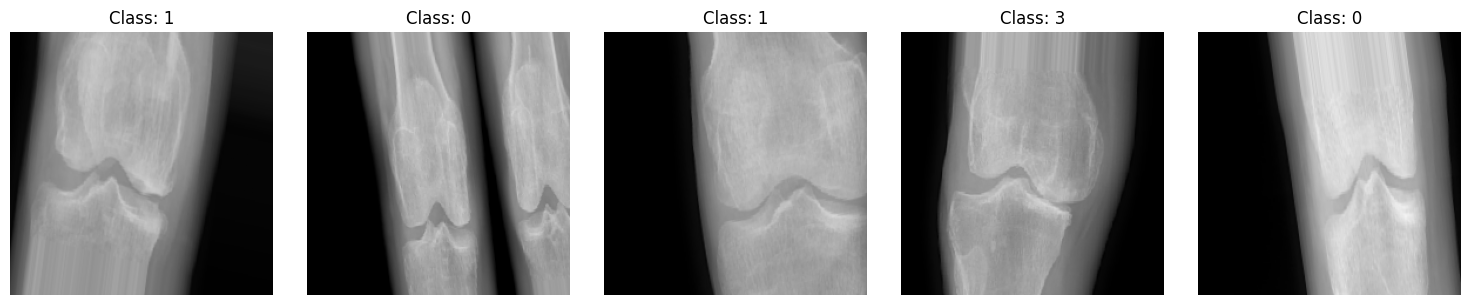

In [ ]:
import matplotlib.pyplot as plt

# Define the number of augmented images to visualize
num_samples = 5

# Generate augmented samples
augmented_samples = train_datagen.flow_from_directory(
    dataset_path_2,  # Target directory
    target_size=(img_height, img_width),  # Resize images to match model input
    batch_size=num_samples,  # Number of samples per batch
    class_mode='categorical',  # Since you have subfolders, it is assumed you have class subdirectories
    shuffle=True  # Shuffle the data for random augmentation
)

# Plot augmented images
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
for i in range(num_samples):
    image, label = augmented_samples.next()
    axes[i].imshow(image[0])
    axes[i].set_title('Class: {}'.format(label.argmax(axis=1)[0]))  # Get the index of the maximum value as the class
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path_2,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path_2,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical'
)


Found 1660 files belonging to 5 classes.
Using 1328 files for training.
Found 1660 files belonging to 5 classes.
Using 332 files for validation.


In [ ]:
import tensorflow as tf

# Assuming train_ds and validation_ds are already defined as shown in your example

# Determine the number of validation batches
# Note: The cardinality method returns the number of batches in the dataset
val_batches = validation_ds.cardinality().numpy()

# Calculate the split (in this example, 50% for validation, 50% for testing)
val_size = int(val_batches * 0.5)

# Split the validation dataset
val_ds = validation_ds.take(val_size)
test_ds = validation_ds.skip(val_size)

# Optionally, you can cache, shuffle, and prefetch the datasets for optimal performance
AUTOTUNE = tf.data.AUTOTUNE
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)



In [ ]:
''' import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, concatenate, Dense
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import InceptionResNetV2

# Define input shape
input_shape = (224, 224, 3)

# Create input tensor
inputs = Input(shape=input_shape)

# Load pre-trained models
efficientnet_model = EfficientNetB7(include_top=False, weights='imagenet', input_shape=input_shape)
densenet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)

# Freeze the layers of the pre-trained models
for layer in efficientnet_model.layers:
    layer.trainable = False

for layer in densenet_model.layers:
    layer.trainable = False

# Get output tensors of pre-trained models
efficientnet_output = efficientnet_model(inputs)
densenet_output = densenet_model(inputs)

# Global Average Pooling layer for both models
efficientnet_pooling = GlobalAveragePooling2D()(efficientnet_output)
densenet_pooling = GlobalAveragePooling2D()(densenet_output)

# Concatenate the outputs of both models
concatenated_output = concatenate([efficientnet_pooling, densenet_pooling])

# Dense layer for classification
outputs = Dense(5, activation='softmax')(concatenated_output)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()
'''
# this gives the same accuracy

219055592/219055592 [==============================] - 1s 0us/step
Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 efficientnetb7 (Functional  (None, 7, 7, 2560)           6409768   ['input_19[0][0]']            
 )                                                        7                                       
                                                                                                  
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)           5433673   ['input_19[0][0]']            
 ional)                                                   6                                       
                         

In [ ]:
from tensorflow.keras.applications import EfficientNetB1 # loss- 0.59, accuracy- 81%
from tensorflow.keras.applications import VGG19

base_model = EfficientNetB1(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base model to prevent weights from being updated during the first phase of training
base_model.trainable = False
# Extract features from the base model
features = base_model.output

In [ ]:
from tensorflow.keras import layers, models, regularizers
from keras.regularizers import l2
from keras.optimizers import Adamax

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),  # Adding Batch Normalization
    layers.Dense(256, activation='relu',kernel_regularizer=l2( l2=0.01)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),  # Adding Batch Normalization

    layers.Dense(256, activation='relu',kernel_regularizer=l2( l2=0.01)),  # Additional Dense layer with 128 units and ReLU activation
    layers.Dropout(0.5),  # Dropout layer after the additional Dense layer

    layers.Dense(5, activation='softmax')  # Assuming 5 categories for severity
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
initial_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the step decay function
def step_decay(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10
    new_lr = initial_lr * (drop ** (np.floor(epoch / epochs_drop)))
    return new_lr
# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)



In [ ]:
# Apply data augmentation to the training dataset
#train_generator = train_datagen.flow(train_ds)

epochs = 40  # Adjust based on your dataset size and desired training time
import numpy as np
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  #callbacks=[lr_scheduler]
)


Epoch 1/40
42/42 [==============================] - 5s 127ms/step - loss: 0.6391 - accuracy: 0.9556 - val_loss: 1.0573 - val_accuracy: 0.8253
Epoch 2/40
42/42 [==============================] - 5s 123ms/step - loss: 0.6675 - accuracy: 0.9352 - val_loss: 1.0671 - val_accuracy: 0.8313
Epoch 3/40
42/42 [==============================] - 5s 124ms/step - loss: 0.6412 - accuracy: 0.9413 - val_loss: 1.0688 - val_accuracy: 0.8343
Epoch 4/40
42/42 [==============================] - 6s 144ms/step - loss: 0.6405 - accuracy: 0.9443 - val_loss: 1.0205 - val_accuracy: 0.8343
Epoch 5/40
42/42 [==============================] - 6s 139ms/step - loss: 0.6161 - accuracy: 0.9518 - val_loss: 1.0395 - val_accuracy: 0.8253
Epoch 6/40
42/42 [==============================] - 5s 123ms/step - loss: 0.6081 - accuracy: 0.9526 - val_loss: 1.0136 - val_accuracy: 0.8313
Epoch 7/40
42/42 [==============================] - 6s 147ms/step - loss: 0.5858 - accuracy: 0.9563 - val_loss: 1.0224 - val_accuracy: 0.8042
Epoch 

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


6/6 [==============================] - 0s 78ms/step - loss: 0.9466 - accuracy: 0.8023
Test Loss: 0.9465818405151367
Test Accuracy: 0.8023256063461304


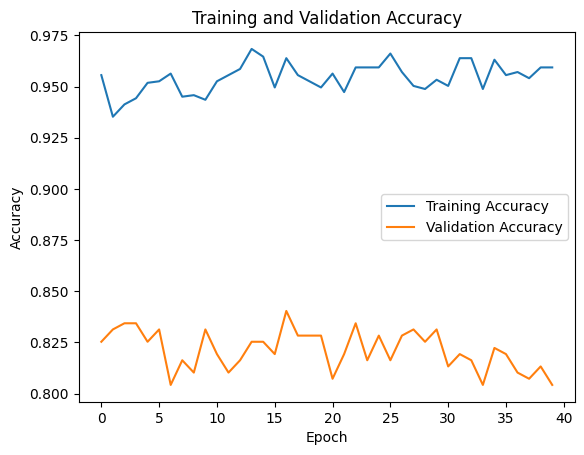

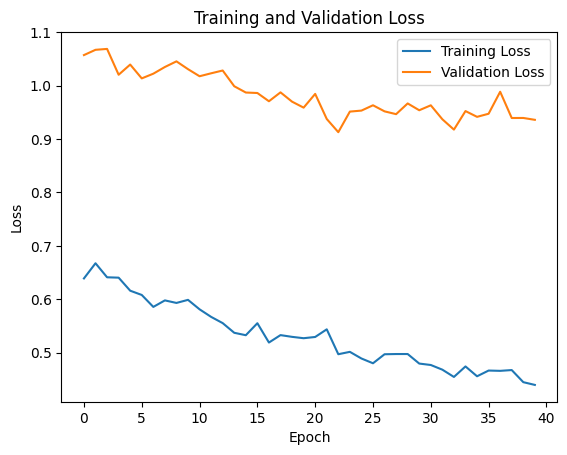

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
''' EfficientnetB7 at 0.02 dropout rate - 512 -for 50 epochs- Training accuracy- 96%   , validation acc- 80%
testing acc - 80%

ensemble model - efficientnetb7 and densenet169 -  testing accuracy -79.4
also, tried batch normalization and 300 epochs but still the input remains the same- 80-81% '''

' EfficientnetB7 at 0.02 dropout rate - 512 -for 50 epochs- Training accuracy- 96%   , validation acc- 80%\ntesting acc - 80%\n\nensemble model - efficientnetb7 and densenet169 -  testing accuracy -79.4\nalso, tried batch normalization and 300 epochs but still the input remains the same- 80-81% '